# Đề thi cuối kỳ Đại số tuyến tính tính toán trong Khoa học dữ liệu
## Trường ĐH Công nghiệp TPHCM - Khoa CNTT

> Ngày $29/5/2022$, tiết $4-6$. Thời gian làm bài: $90$ phút. SV được dùng tài liệu và Internet.

In [1]:
import numpy as np

### Bài 1. (2đ)
Cho hai ma trận vuông $3 \times 3$ sau đây:
$$A=\left( \begin{matrix}
   2 & 2 & 1  \\
   2 & 5 & 3  \\
   2 & 3 & 5  \\
\end{matrix} \right) \text{ và } B=\left( \begin{matrix}
   3 & 1 & 2  \\
   -1 & 2 & 4  \\
   2 & 6 & 3  \\
\end{matrix} \right).$$
- **a)** Hỏi trong các đẳng thức sau có bao nhiêu đẳng thức đúng, hãy kiểm chứng bằng code: $$(A+B)^T = A^T+B^T, \, AB=BA, \,(AB)^{-1} = B^{-1}A^{-1}.$$
- **b)** Tìm ma trận $C$ thỏa mãn $AC - C = B$. *Gợi ý:* $C = CI = IC$ với $I$ là ma trận đơn vị.
- **c)** Tìm vector $\textbf{x}$ thỏa mãn $A\textbf{x} = B \textbf{b}$ với $\textbf{x}^T = (x_1,x_2,x_3)$ và $\textbf{b}^T = (1,-2,-3)?$ Hỏi có tồn tại vector $\textbf{x}$ để cho $A\textbf{x} = \textbf{b}B$ hay không? Vì sao?

In [2]:
A = np.matrix([[2, 2, 1], [2, 5, 3], [2, 3, 5]])
B = np.matrix([[3, 1, 2], [-1, 2, 4], [2, 6, 3]])

a)<br>
+ Các đẳng thức đúng là $(AB)^{-1} = B^{-1}A^{-1}$ và $(A+B)^T = A^T + B^T$
+ Đẳng thức sai là $AB = BA$, do tích hai ma trận không có tính chất giao hoán

In [10]:
# kiểm chứng bẳng code
# 1. (A+B)^T = A^T + B^T
np.allclose((A+B).T, A.T+B.T)

True

In [11]:
# 2. AB = BA
np.allclose(A@B, B@A)

False

In [12]:
# 3. (AB)^-1 = (B^-1)(A^-1)
np.allclose((A@B).I, B.I@A.I)

True

b) Ta có: $AC - C = B$<br>
$\rightarrow (A-I)C = B $
$\rightarrow C = (A-I)^{-1}B$

In [3]:
C = (A-np.identity(n=3)).I @ B
print("Ma trận C:\n", C)

Ma trận C:
 [[ 30.   9.   0.]
 [-10.  -4.   1.]
 [ -7.   0.   0.]]


c) Ta có:<br>
$Ax = Bb \rightarrow x = A^{-1}Bb$, với $|A|, |B| \ne 0$

In [24]:
b = np.array([1, -2, -3]).reshape(-1, 1)
x = A.I@B@b
print('Vector x = ', x.T)

Vector x =  [[ 1. -2. -3.]]


Không tồn tại vector $x$ để $Ax = bB$ (1)<br>
vì b có thể được biết như là một ma trận côt có kích thước 3x1 và B là ma trận vuông có kích thước 3x3, và ma trậ 3x1 không thể nhân với ma trận 3x3 $\rightarrow$ không tồn tại vector x thỏa phương trình (1)

### Bài 2. (2 điểm) phân rã LU
Cho ma trận vuông $4 \times 4$ sau đây:
$$A=\left( \begin{matrix}
   3 & 2 & 5 & 9  \\
   1 & 7 & 5 & 7  \\
   5 & 10 & 5 & 3 \\
   6 & 9 & 7 & 2
\end{matrix} \right).$$

* a) Hãy phân tích ma trận $A$ thành các thành phần $P, L, U$ (bằng thư viện thích hợp) và in ra kết quả.
* b) Tái tạo (phục hồi) ma trận $A$ từ các thành phần $P, L, U.$
* c) Hỏi phân rã LU có những ứng dụng thực tế nào?

In [5]:
import scipy
from scipy.linalg import lu
A = np.array([[3., 2. , 5., 9.], [1.,7., 5., 7.], [5., 10., 5., 3.], [6., 9., 7.,2.]])
P, L, U = lu(A)

In [7]:
P, L, U

(array([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.16666667,  1.        ,  0.        ,  0.        ],
        [ 0.5       , -0.45454545,  1.        ,  0.        ],
        [ 0.83333333,  0.45454545, -0.79439252,  1.        ]]),
 array([[ 6.        ,  9.        ,  7.        ,  2.        ],
        [ 0.        ,  5.5       ,  3.83333333,  6.66666667],
        [ 0.        ,  0.        ,  3.24242424, 11.03030303],
        [ 0.        ,  0.        ,  0.        ,  7.06542056]]))

In [8]:
P.dot(L).dot(U)

array([[ 3.,  2.,  5.,  9.],
       [ 1.,  7.,  5.,  7.],
       [ 5., 10.,  5.,  3.],
       [ 6.,  9.,  7.,  2.]])

c) Ứng dụng của LU: SV tự tìm hiểu trên mạng.

### Bài 3. (2.5đ)
Một thí nghiệm xét mối liên hệ giữa độ giảm trọng lượng của hợp chất ($y$, tính bằng gam) và khoảng thời gian mà hợp chất tiếp xúc với không khí ($x$, tính bằng năm), trong đó số âm có thể hiểu là giai đoạn xử lý nguyên liệu, trước khi điều chế ra hợp chất. Ta có bảng dữ liệu như sau:

| $x$    | $-2$ | $0$   | $1$  | $2$  | $4$   |
|--------|------|-------|------|------|-------|
| $y$    | $-1$ | $1.5$ | $3.1$| $6.3$| $11.1$| 

- **a)** Giả sử $x,y$ thỏa mãn mô hình $y=a+bx+c \ln(x^2+1).$ Hãy sử dụng phương pháp bình phương cực tiểu, ước lượng các tham số $a,b,c.$ <br>
- **b)** Vẽ đồ thị cho dữ liệu. Sử dụng kết quả trên để dự đoán $y$ khi $x = 6.5$. <br>
- **c)** Hỏi có nên dùng mô hình $y=a+bx+c \ln(x)$ hoặc $y = a+bx+\frac{c}{x}$ để xấp xỉ dữ liệu trên không? Vì sao?

In [59]:
from scipy import linalg

In [60]:
#Hàm logarit nepe trong Python là np.log(x), khởi tạo ma trận hệ số
x = np.array([-2, 0, 1, 2, 4])
A = np.hstack((np.ones(shape=(x.size, 1)), x.reshape(-1, 1), np.log(x**2+1).reshape(-1, 1)))
b = np.array([-1, 1.5, 3.1, 6.3, 11.1])
#dùng công thức tính ma trận giả nghịch đảo:


a) Đặt: $\beta = (a, b, c)^T$, $a_i = (1, x, ln(x^2+1))^T$<br>
$\rightarrow y_i = a_i^T\beta$ <br>
và $A = (a_1, a_2, ..., a_n)^T, b=(y_1, y_2, ...y_n)^T$<br>
Theo phương pháp bình phương cực tiểu ta có:<br>
$\beta = (A^TA)^{-1}A^Tb$

In [61]:
beta = linalg.inv(A.T@A).dot(A.T.dot(b))
print('a = ', beta[0])
print('b = ', beta[1])
print('c = ', beta[2])

a =  1.1444648271875462
b =  1.811518607733428
c =  0.9221445332854241


b) vẽ đồ thị cho dự liệu

In [62]:
def predict(x):
    return np.array([1, x, np.log(x**2 + 1)]).dot(beta)

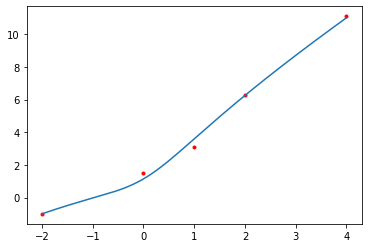

In [63]:
#code để vẽ đồ thị cho dữ liệu
from matplotlib import pyplot as plt
plt.scatter(x, b, marker=".", color="red")
# ... #plot các điểm khác tương tự
t = np.linspace(x.min(), x.max(), 1000)
plt.plot(t, [predict(r) for r in t])
plt.show()

+ Dự đoán kết quả y khi x = 6.5 $\rightarrow \hat y = f(x) = (1, x, ln(x^2+1))\beta$

In [58]:
print('Kết quả dự đoán là y = f(6.5) = ', predict(6.5))

Kết quả dự đoán là y = f(6.5) =  16.393051683115566


c) Không nên dùng mô hình $y=a+bx+c \ln(x)$ hoặc $y = a+bx+\frac{c}{x}$ để xấp xỉ dữ liệu trên, vì dữ liệ có $x = 0$ mà khi $x = 0$ thì cả $ln(x), \frac{1}{x}$ đều tiến đến vô cùng vì thế sẽ không thể dùng tính toán được các hệ số a, b, c cho mô hình

### Bài 4. (2.5đ)
Theo khảo sát trong sinh viên của ĐH Công nghiệp TPHCM đối với ba quán cafe $A,B,C$ trước cổng trường thì người ta có thông tin về sự thay đổi lượng khách đến quán sau mỗi tuần như bên dưới, cho biết thêm rằng ban đầu, hai quán $A,B$ chưa mở nên $100\%$ khách đều đến $C$:
 * + Trong những SV đến quán cafe $A$, sẽ có $20\%$ người tiếp tục đến $A$, có $60\%$ người sang $B$ và $20\%$ người sang $C$.
 * + Trong những SV đến quán cafe $B$, sẽ có $10\%$ người sang $A$, có $40\%$ người tiếp tục đến $B$ và $50\%$ người sang $C$.
 * + Trong những SV đến quán cafe $C$, sẽ có $70\%$ người sang $A$, có $20\%$ người sang $B$ và $10\%$ người tiếp tục đến $C$.

- **a)** Hãy lập ma trận chuyển trạng thái Markov $X$ kích thước $3 \times 3$ mô tả cho sự thay đổi của lượng người đến các quán. Từ đó tính tỷ lệ phần trăm những người đến quán $A,B,C$ sau $1$ tháng ($4$ tuần).
- **b)** Bằng cách khảo sát các lũy thừa ma trận với số mũ lớn, hãy cho biết thị phần ổn định của các quán sau khi hoạt động trong thời gian đủ lâu. Hãy thực hiện việc này bằng $2$ cách sau: dùng vòng lặp for, dùng thư viện của numpy.linalg.

In [71]:
#Gợi ý code mẫu như sau
X = np.array([[0.2, 0.1, 0.7], [0.6, 0.4, 0.2], [0.2, 0.5, 0.1]]) # ma trận chuyển trạng thái
v = np.array([0, 0, 1]) # vector mô tả tỷ lệ khách ban đầu của A, B, C
#a) sau khi hoạt động một tháng
print('Tỉ lệ phần trăm người đến quán A, B, C sau 1 tháng (4 tuần) là: ', np.linalg.matrix_power(X, 4).dot(v))
#b) Chọn lũy thừa thích hợp đến khi ma trận hội tụ thì nêu đáp số
#Cách 1: dùng thư viện
X1 = np.linalg.matrix_power(X, 100)
print("Thị phần ổn định sau 1 khoảng thời gian 100 tuần:")
print("Theo cách 1:")
print(X1)
# Cách 2: dùng vòng lặp:
X2 = X
for _ in range(100):
    X2 = X2.dot(X)
print('Theo cách 2:')
print(X2)

Tỉ lệ phần trăm người đến quán A, B, C sau 1 tháng (4 tuần) là:  [0.3259 0.3884 0.2857]
Thị phần ổn định sau 1 khoảng thời gian 100 tuần:
Theo cách 1:
[[0.30555556 0.30555556 0.30555556]
 [0.40277778 0.40277778 0.40277778]
 [0.29166667 0.29166667 0.29166667]]
Theo cách 2:
[[0.30555556 0.30555556 0.30555556]
 [0.40277778 0.40277778 0.40277778]
 [0.29166667 0.29166667 0.29166667]]


### Bài 5. (1đ)
- **a)** Hãy tải về một ảnh bất kỳ, đặt tên là *picture.jpg*, hiển thị lên notebook và cho biết tỷ lệ giữa chiều dài, rộng của nó.
- **b)** Hãy chỉnh sửa ra một ảnh mới với tên *new_pic.jpg* từ ảnh ở trên với kích thước mới có tỷ lệ chiều dài, rộng bằng tỷ lệ của giấy in, tức là $1 : \sqrt{2}$. Hãy cho biết cơ sở nào của đại số tuyến tính được sử dụng trong các thao tác xử lý ảnh này?

In [93]:
#Gợi ý code mẫu như sau
from PIL import Image
import urllib.request
from io import BytesIO
url = str('https://anh.eva.vn/upload/3-2017/images/2017-07-11/ghen-ti-voi-nhung-thu-chi-thuoc-ve-nu-than-han-quoc-song-hye-kyo-3-1499791578-width500height330.jpg')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

img = Image.open(f) #có thể đổi tên đường dẫn thích hợp
# #a) Hiển thị ảnh và kích thước dài - rộng
print('Chiều dài ảnh: ', img.height)
print('Chiều rộng ảnh: ', img.width)
print('Tỉ lệ chiều dài và rộng là: ', 1, ":", img.height/img.width)
# #b) Điều chỉnh kích thước và hiển thị lại ảnh mới

# new_img = ...
# new_img.save(r'C:\Users\Admin\Desktop\new_pic.jpg') #có thể đổi tên đường dẫn thích hợp
# ...

Chiều dài ảnh:  330
Chiều rộng ảnh:  500
Tỉ lệ chiều dài và rộng là:  1 : 0.66


In [96]:
widthPer = 1
heightPer = np.sqrt(2)
new_width = int(widthPer*img.width)
new_height = int(heightPer*img.width)
new_img = img.resize((new_width, new_height))
new_img.save('new_pic.jpg')


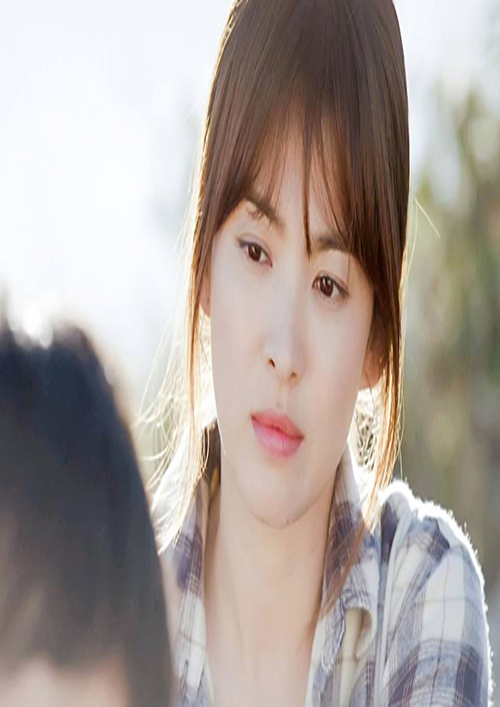

In [97]:
new_img